In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger
pd.set_option('display.max_columns',2000) # show all columns in jupyter
pd.set_option('display.max_rows', 100) # display 100 at least rows

In [73]:
colsToLoad =["INSTNM","ADM_RATE","ADM_RATE_ALL","ACTCMMID","ACTENMID","ACTMTMID","ACTWRMID","SAT_AVG","SAT_AVG_ALL","UGDS","HIGHDEG", "CONTROL", "TUITFTE", "INEXPFTE", "AVGFACSAL", "COSTT4_P",
             "COSTT4_A", "PCTFLOAN", "PCTPELL", "COMP_ORIG_YR2_RT", "MEDIAN_HH_INC","UGDS_WHITE","UGDS_BLACK","UGDS_HISP","UGDS_ASIAN","UGDS_AIAN","UGDS_NHPI","UGDS_2MOR","UGDS_NRA","UGDS_UNKN","PPTUG_EF","COSTT4_A","COSTT4_P","TUITIONFEE_IN","TUITIONFEE_OUT","TUITIONFEE_PROG","TUITFTE","INEXPFTE","AVGFACSAL","PCTPELL","DEATH_YR3_RT","LOAN_DEATH_YR3_RT","LOAN_COMP_ORIG_YR3_RT","DEATH_YR4_RT","AGE_ENTRY","COUNT_NWNE_P10","COUNT_WNE_P10","MN_EARN_WNE_P10","MD_EARN_WNE_P10","COMPL_RPY_1YR_RT"]
scoreCardDF = pd.read_csv("D:/DataScience/NU/FinalProject/Datasets/2013/MERGED2013_14_PP.csv", index_col="INSTNM",usecols=colsToLoad)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1606) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
scoreCardDF.shape

(7804, 43)

In [75]:
def cleanPrivacySuppressed(dataFrame):
    for colName in dataFrame.columns:
        dataFrame[colName] = dataFrame[colName].apply(lambda x: np.nan if x =="PrivacySuppressed" else x)
        dataFrame[colName]= pd.to_numeric(dataFrame[colName])

In [76]:
cleanPrivacySuppressed(scoreCardDF )
scoreCardDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7804 entries, Alabama A & M University to Georgia Military College-Stone Mountain
Data columns (total 43 columns):
HIGHDEG                  7804 non-null int64
CONTROL                  7804 non-null int64
ADM_RATE                 2221 non-null float64
ADM_RATE_ALL             2486 non-null float64
ACTCMMID                 1344 non-null float64
ACTENMID                 1167 non-null float64
ACTMTMID                 1168 non-null float64
ACTWRMID                 300 non-null float64
SAT_AVG                  1422 non-null float64
SAT_AVG_ALL              1532 non-null float64
UGDS                     7091 non-null float64
UGDS_WHITE               7091 non-null float64
UGDS_BLACK               7091 non-null float64
UGDS_HISP                7091 non-null float64
UGDS_ASIAN               7091 non-null float64
UGDS_AIAN                7091 non-null float64
UGDS_NHPI                7091 non-null float64
UGDS_2MOR                7091 non-null float64

In [77]:
target_df=scoreCardDF["COMPL_RPY_1YR_RT"]
features_df=scoreCardDF.drop(columns=["COMPL_RPY_1YR_RT"])
features_df=features_df.fillna(0)
target_df=target_df.fillna(0)
features_df

,HIGHDEG,CONTROL,ADM_RATE,ADM_RATE_ALL,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,PCTFLOAN,COMP_ORIG_YR2_RT,DEATH_YR3_RT,LOAN_DEATH_YR3_RT,LOAN_COMP_ORIG_YR3_RT,DEATH_YR4_RT,AGE_ENTRY,MEDIAN_HH_INC,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10
INSTNM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,4,1,0.8989,0.898900,17.0,17.0,17.0,0.0,823.0,823.0,4051.0,0.0279,0.9501,0.0089,0.0022,0.0012,0.0010,0.0000,0.0002,0.0084,0.0622,18888.0,0.0,7182.0,12774.0,0.0,9063.0,7459.0,7079.0,0.7115,0.8204,0.034959,0.000000,0.0,0.087333,0.000000,20.540410,0.0,246.0,1741.0,34300.0,29900.0
University of Alabama at Birmingham,4,1,0.8673,0.867300,25.0,26.0,23.0,0.0,1146.0,1146.0,11200.0,0.5987,0.2590,0.0258,0.0518,0.0026,0.0007,0.0344,0.0140,0.0130,0.2579,19990.0,0.0,7206.0,16398.0,0.0,9033.0,17208.0,10170.0,0.3505,0.5397,0.150529,0.000000,0.0,0.332665,0.000000,23.458815,0.0,470.0,3474.0,46400.0,40200.0
Amridge University,4,2,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,322.0,0.2919,0.4224,0.0093,0.0031,0.0031,0.0031,0.0000,0.0000,0.2671,0.3727,12300.0,0.0,6870.0,6870.0,0.0,12057.0,5123.0,3849.0,0.6839,0.7629,0.058824,0.000000,0.0,0.000000,0.000000,33.925581,0.0,57.0,168.0,46100.0,40100.0
University of Alabama in Huntsville,4,1,0.8062,0.806200,26.0,26.0,25.0,0.0,1180.0,1180.0,5525.0,0.7012,0.1310,0.0338,0.0364,0.0145,0.0002,0.0161,0.0329,0.0338,0.2395,20306.0,0.0,9192.0,21506.0,0.0,8322.0,9352.0,9341.0,0.3281,0.4728,0.157939,0.000000,0.0,0.283109,0.000000,24.101277,0.0,188.0,1361.0,50500.0,45600.0
Alabama State University,4,1,0.5125,0.512500,17.0,17.0,17.0,0.0,830.0,830.0,5354.0,0.0161,0.9285,0.0114,0.0015,0.0009,0.0007,0.0064,0.0207,0.0138,0.0902,17400.0,0.0,8720.0,15656.0,0.0,7813.0,7393.0,6557.0,0.8265,0.8735,0.028949,0.000000,0.0,0.109495,0.000000,20.648575,0.0,285.0,1977.0,29500.0,26700.0
The University of Alabama,4,1,0.5655,0.565500,26.0,27.0,25.0,7.0,1171.0,1171.0,28692.0,0.7865,0.1140,0.0313,0.0112,0.0044,0.0011,0.0210,0.0278,0.0028,0.0852,26717.0,0.0,9450.0,23950.0,0.0,12198.0,9817.0,9605.0,0.2107,0.4148,0.086230,0.000000,0.0,0.335559,0.000000,21.527737,0.0,409.0,3648.0,49900.0,42700.0
Central Alabama Community College,2,1,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1779.0,0.6785,0.2945,0.0118,0.0022,0.0022,0.0011,0.0006,0.0011,0.0079,0.4660,12103.0,0.0,4200.0,7500.0,0.0,2371.0,5935.0,5805.0,0.6515,0.4777,0.019916,0.000000,0.0,0.051565,0.000000,24.816201,0.0,190.0,761.0,30900.0,27200.0
Athens State University,3,1,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2999.0,0.7513,0.1064,0.0213,0.0047,0.0190,0.0007,0.0133,0.0070,0.0764,0.5502,0.0,0.0,0.0,0.0,0.0,5094.0,6176.0,7672.0,0.4107,0.6277,0.333333,0.000000,0.0,0.488918,0.000000,30.283219,0.0,126.0,928.0,42200.0,38500.0
Auburn University at Montgomery,4,1,0.8371,0.837100,21.0,21.0,20.0,0.0,970.0,970.0,4322.0,0.5532,0.3031,0.0079,0.0245,0.0037,0.0002,0.0049,0.0435,0.0590,0.3061,16556.0,0.0,8750.0,24950.0,0.0,7625.0,6817.0,7173.0,0.4006,0.6476,0.094163,0.000000,0.0,0.147189,0.000000,22.999159,0.0,195.0,1409.0,37900.0,33500.0


In [78]:
X = features_df
y = target_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape)
print(X_test.shape)

(5462, 42)
(2342, 42)


training score: 0.46194694199258257
test score:  0.5138382042148704
number of features used:  13
training score for alpha=0.01: 0.4711052090887946
test score for alpha =0.01:  0.5200051984361971
number of features used: for alpha =0.01: 18
training score for alpha=0.0001: 0.5812715421989139
test score for alpha =0.0001:  0.6111033678587696
number of features used: for alpha =0.0001: 36


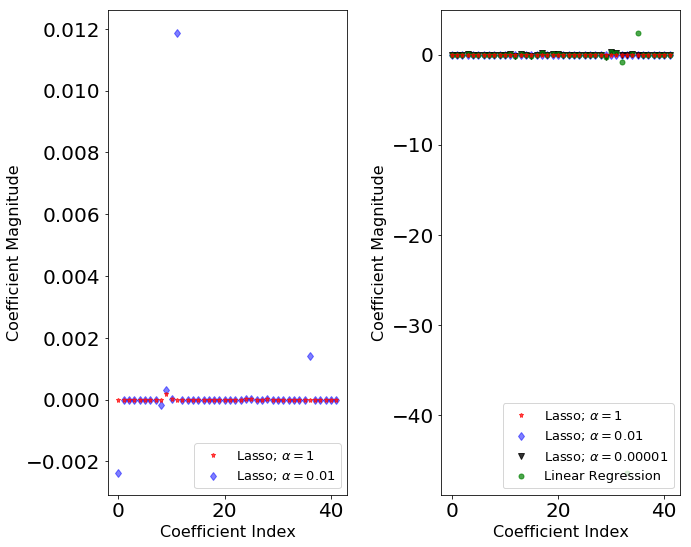

In [71]:
X = features_df
Y = target_df
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()